In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('breast_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,CLASS
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,10015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,10162777,6,8,8,1,3,3.0,3,2,1,benign
4,5,1017023,4,0,1,3,2,4.0,3,1,1,benign
5,6,1005213,5,9,2,7,7,7.1,3,2,1,benign
6,7,10026412,7,0,0,6,1,2.0,3,7,0,maliginant
7,8,1015277,2,5,5,2,0,4.1,3,1,0,maliginant
8,9,10061220,1,8,8,3,3,1.1,3,2,0,maliginant
9,10,10000011,0,2,2,1,0,1.3,3,0,0,maliginant


In [4]:
df = df.drop(['Unnamed: 0','ID'],axis=1)

In [5]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
CLASS    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10 non-null     int64  
 1   V2      10 non-null     int64  
 2   V3      10 non-null     int64  
 3   V4      10 non-null     int64  
 4   V5      10 non-null     int64  
 5   V6      10 non-null     float64
 6   V7      10 non-null     int64  
 7   V8      10 non-null     int64  
 8   V9      10 non-null     int64  
 9   CLASS   10 non-null     object 
dtypes: float64(1), int64(8), object(1)
memory usage: 932.0+ bytes


In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,3.800000,3.800000,3.200000,3.000000,2.700000,3.560000,3.0,1.900000,0.600000
std,2.250926,3.521363,2.936362,2.260777,2.496664,2.932273,0.0,1.911951,0.516398
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.0,0.000000,0.000000
25%,2.250000,1.000000,1.000000,1.000000,1.250000,1.475000,3.0,1.000000,0.000000
50%,4.500000,3.000000,2.000000,2.500000,2.000000,2.500000,3.0,1.500000,1.000000
75%,5.000000,7.250000,4.750000,4.500000,3.000000,4.075000,3.0,2.000000,1.000000
max,7.000000,9.000000,8.000000,7.000000,7.000000,10.000000,3.0,7.000000,1.000000


In [8]:
x=df.iloc[:,:-1]
y=df['CLASS']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=123, max_depth=7) # Correct parameter name to 'max_depth'

In [11]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

In [12]:
print("model score on train set",dtc.score(x_train,y_train))

model score on train set 1.0


In [13]:
print("model score on test set",dtc.score(x_test,y_test))

model score on test set 1.0


C:\Users\Neha\Desktop\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


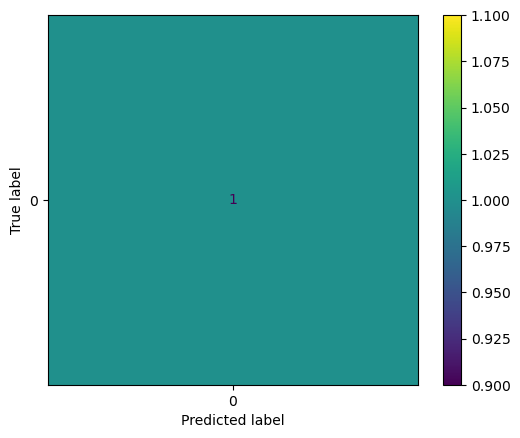

In [14]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# Predict labels for the test set
y_pred = dtc.predict(x_test)

# Calculate the confusion matrix using the predicted labels
cm = metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Create a ConfusionMatrixDisplay object
disp.plot(); # Plot the confusion matrix

C:\Users\Neha\AppData\Local\Temp\ipykernel_2248\898954137.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Neha\AppData\Local\Temp\ipykernel_2248\898954137.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Neha\AppData\Local\Temp\ipykernel_2248\89

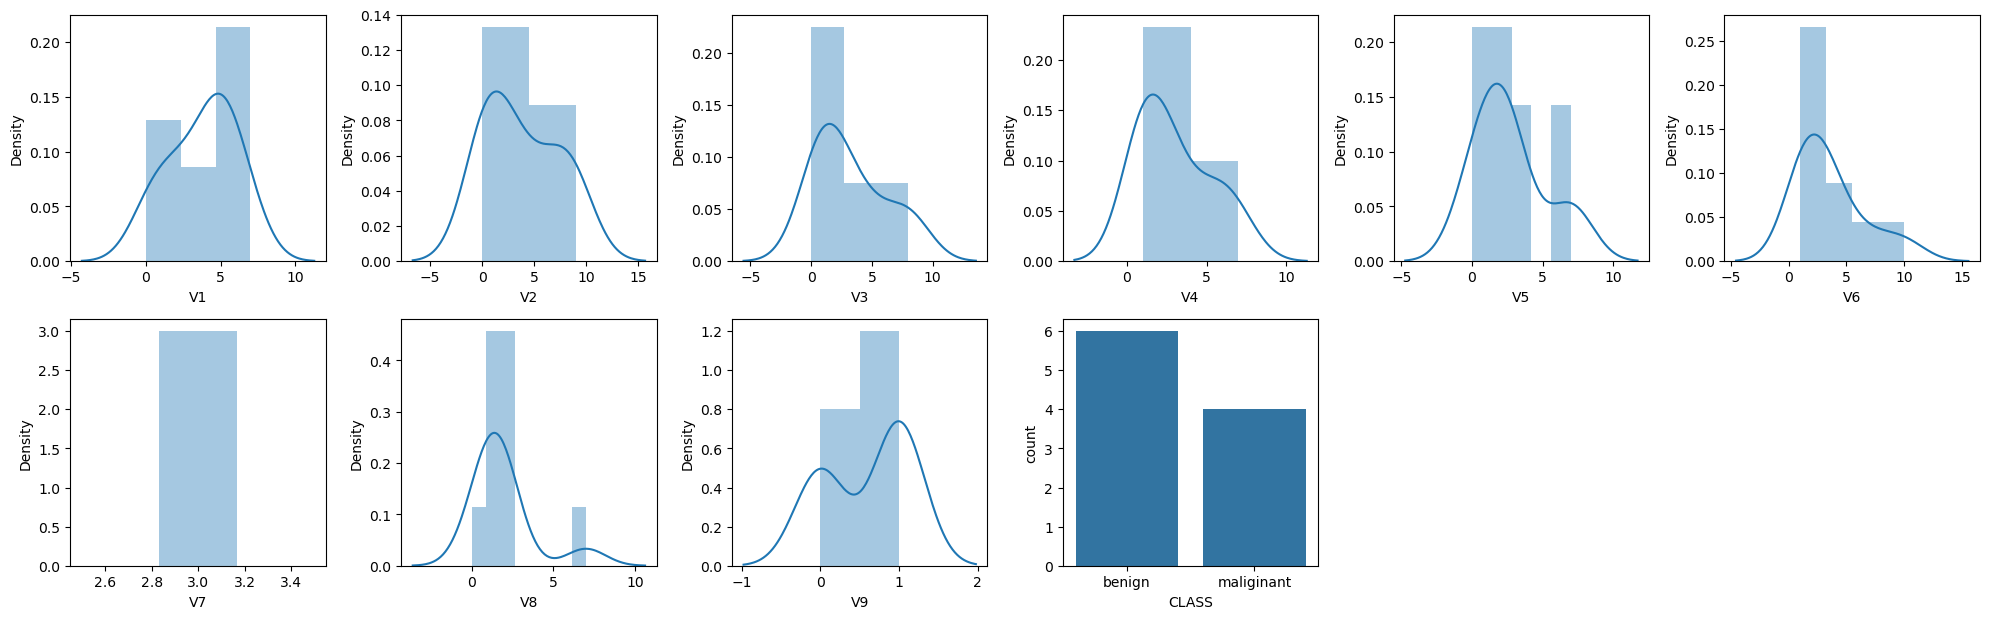

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        if df[column].dtype in ['int64', 'float64']:  # Check if column is numeric
            sns.distplot(df[column])
            plt.xlabel(column)
        else:
            # Handle categorical columns differently, e.g., with a countplot
            sns.countplot(x=df[column])
            plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [16]:
# Convert 'benign' to a numerical representation if it's a categorical variable
# For example, if 'benign' is one category and there's another category, you could map them to 0 and 1:
df['V1'] = df['V1'].map({'benign': 0, 'other_category': 1})  # Replace 'other_category' if needed

# Calculate correlations on numerical columns only
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

    V1        V2        V3            V4        V5        V6  V7        V8  \
V1 NaN       NaN       NaN           NaN       NaN       NaN NaN       NaN   
V2 NaN  1.000000  0.767247  2.093535e-01  0.510585  0.296136 NaN -0.118824   
V3 NaN  0.767247  1.000000 -2.175873e-01  0.145499  0.041037 NaN -0.174162   
V4 NaN  0.209354 -0.217587  1.000000e+00  0.610241  0.598362 NaN  0.616928   
V5 NaN  0.510585  0.145499  6.102409e-01  1.000000  0.787396 NaN  0.039570   
V6 NaN  0.296136  0.041037  5.983616e-01  0.787396  1.000000 NaN -0.002775   
V7 NaN       NaN       NaN           NaN       NaN       NaN NaN       NaN   
V8 NaN -0.118824 -0.174162  6.169279e-01  0.039570 -0.002775 NaN  1.000000   
V9 NaN  0.012221 -0.161208 -4.226547e-17  0.586033  0.421193 NaN -0.270089   

              V9  
V1           NaN  
V2  1.222059e-02  
V3 -1.612079e-01  
V4 -4.226547e-17  
V5  5.860327e-01  
V6  4.211926e-01  
V7           NaN  
V8 -2.700895e-01  
V9  1.000000e+00  


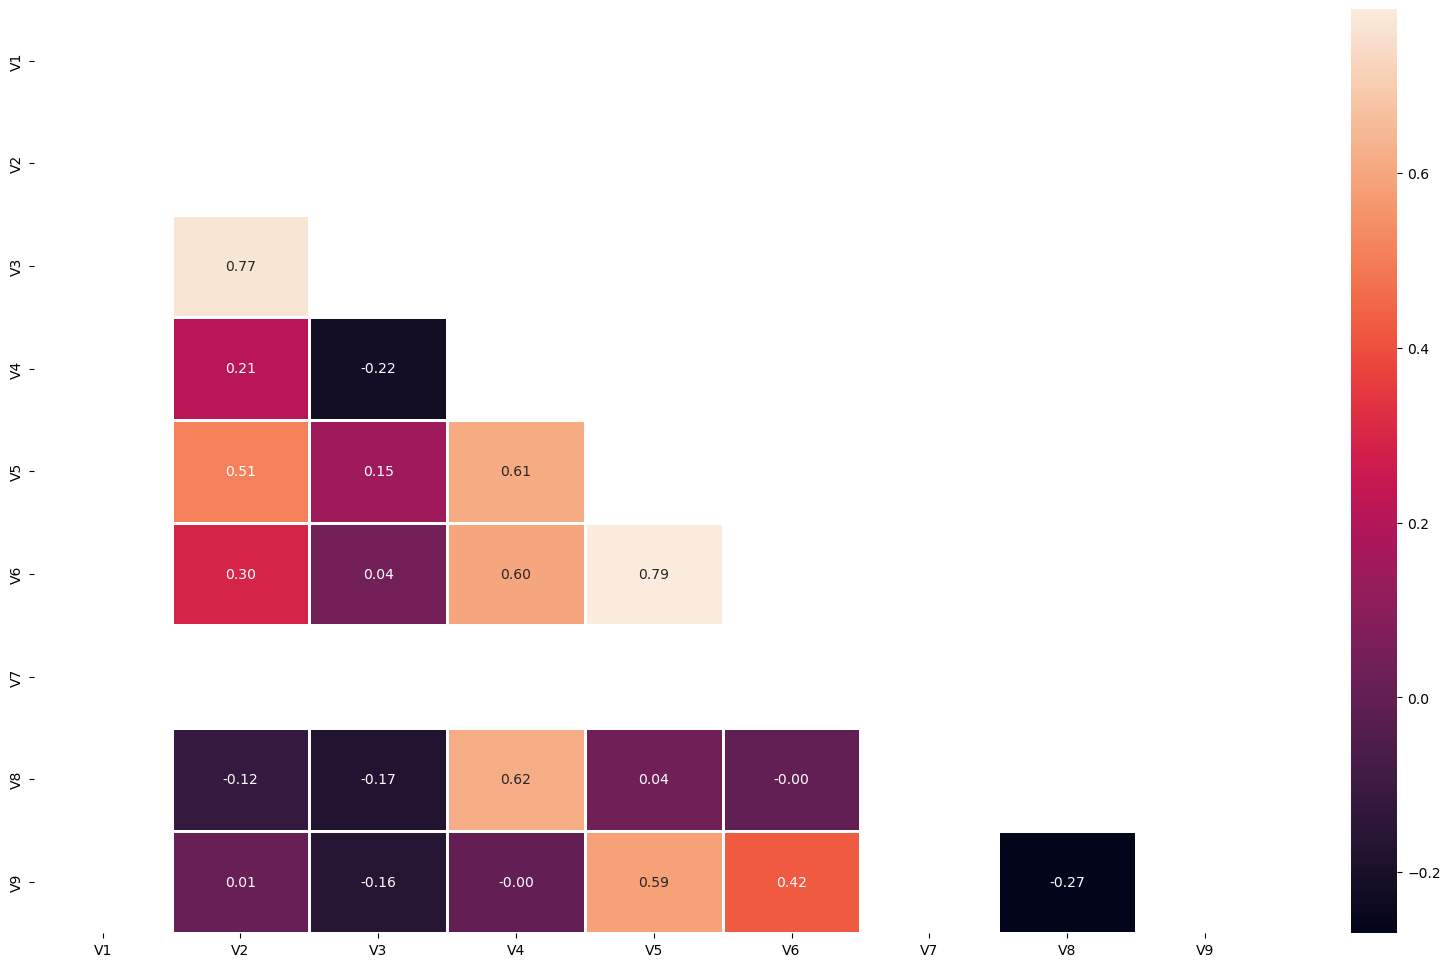

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20,12))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f")
plt.show()

In [18]:
import pickle

In [19]:
filename = 'breast.pkl'
pickle.dump(dtc,open(filename,'wb'))

In [20]:
load_saved_model=pickle.load(open('breast.pkl','rb'))

In [21]:
load_saved_model.score(x_test,y_test)

1.0